## Energy Compaction Properties of Transforms

In [1]:
## Libraries to be imported

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import cmath as c
%matplotlib inline

In [3]:
## The components to be removed

In [4]:
P=[]
for i in range(0,8):
    P.append(i*10)
P

[0, 10, 20, 30, 40, 50, 60, 70]

## Haar Transform

In [5]:
def haarMatrix(n, normalized=True):
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h
   

In [6]:
def haarcompute(x):
    A = haarMatrix(64)
    b = np.matmul(A,x.transpose())  
    return b

## DCT Computation

In [7]:
# This function returns the DCT of input x

def DCT(a):
    N=len(a)
    A=[]
    for i in range(N):
        t=0
        for j in range(N):
            t+=2*x[j]*np.cos(((m.pi)*i*(2*j+1))/(2*N))
        A.append(t)
    return A

## IDCT Computation

In [8]:
# This function returns the IDCT of input x

def IDCT(A):
    N=len(A)
    a=[]
    g=[0.5]
    for i in range(N-1):
        g.append(1)
    for n in range(N):
        t=0
        for k in range(N):
            t+=g[k]*A[k]*np.cos(((m.pi)*k*(2*n+1))/(2*N))
        a.append(t/N)
    return a

## DCT Compression

In [9]:
def DCTreduced(A,L):
    N=len(A)
    Am_DCT=[]
    for i in range(N):
        if i<=(N-1-L):
            Am_DCT.append(A[i])
        else:
            Am_DCT.append(0)
    return Am_DCT

## DFT Computation

In [10]:
# This function creates a DFT matrix of size NxN which is used in DFT computation 

def DFT(N,a):
    W=c.exp(((-2*m.pi)/N)*1j)
    D=[]
    for i in range(N):
        d=[]
        for j in range(N):
            d.append(W**(i*j))
        D.append(d)
    A= np.matmul(D,a)
    return A

## IDFT Computation

In [11]:
# This function creates an IDFT matrix of size NxN which is used in IDFT computation 

def IDFT(N,A):
    W1=c.exp(((2*m.pi)/N)*1j)
    D1=[]
    for i in range(N):
        d1=[]
        for j in range(N):
            d1.append(W1**(i*j))
        D1.append(d1)
    a = np.matmul(D1,A)
    N = len(A)
    a = np.divide(a,N)
    return a

## Compressed DFT form

In [12]:
# This function removes some of the components which are to be removed from the input given 
def DFTreduced(A,L):
    Am_DFT=[]
    N=len(A)
    for i in range(N):
        if i<=int((N-1-L)/2):
            Am_DFT.append(A[i])
        elif i>=int((N+1-L)/2) and i<=int((N-1+L)/2):
            Am_DFT.append(0)
        elif i>=int((N+1+L)/2) and i<=N-1:
            Am_DFT.append(A[i])
    return Am_DFT

## Mean Squared Error function

In [13]:
# This function calculates the mean squared error of any two arrays or vectors 

def mse(x,y):
    x=np.array(x)
    y=np.array(y)
    E=np.mean((abs(x-y))**2)
    return E

## Main function

In [14]:
N=64

# x is the input of 64 random numbers in the range of 0-100
x=np.random.randint(100,size=N)

# E1 is the mse array for DFT 
# E2 is the mse array for DCT 
E1 =[]
E2= []

# X1 is the DFT of input x
X1 = DFT(N,x)
for i in range(0,7):
    k=P[i]
    Xm1=DFTreduced(X1,k)
    xm1=IDFT(N,Xm1)
    e=mse(x,xm1)
    E1.append(e)
      
# X2 is the DCT of input x    
X2 = DCT(x)
for i in range(0,7):
    k=P[i]
    Xm2=DCTreduced(X2,k)
    xm2=IDCT(Xm2)
    e=mse(x,xm2)
    E2.append(e)

# b is the haar tranform of input x
b= haarcompute(x)

## Inverse Haar and corresponding Haar Compression

In [15]:
# Finding inverse Haar Transform and corresponding reduced Haar after removing components  

from numpy.linalg import inv

# E3 is the mse array for haar transform
E3 = []
X = x.transpose()
for j in range(0,7):
    bm = []
    sumval = 0
    for i in range(64-P[j]):
        bm.append(b[i])
    for i in range(64-P[j],64):
        bm.append(0)
    xm = np.matmul(inv(haarMatrix(64)),bm)
    for i in range(len(X)):
        sumval = sumval + ((X[i]-xm[i])**2)
        q = sumval/64
    E3.append(q)
    

## Plots of E1, E2, E3

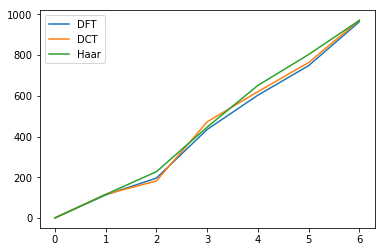

In [16]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(E1, label='DFT')
ax.plot(E2, label='DCT')
ax.plot(E3, label='Haar')
ax.legend()